<p><font size="6"><b> 02 - Pandas: Basic operations on Series and DataFrames</b></font></p>


> *© 2024, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [12]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [13]:
# redefining the example DataFrame

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

In [14]:
countries.head()

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


# Elementwise-operations

The typical arithmetic (+, -, \*, /) and comparison (==, >, <, ...) operations work *element-wise*.

With as scalar:

In [15]:
population = countries['population']
population

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [16]:
population * 1000

0    11300.0
1    64300.0
2    81300.0
3    16900.0
4    64900.0
Name: population, dtype: float64

In [17]:
population > 50

0    False
1     True
2     True
3    False
4     True
Name: population, dtype: bool

With two Series objects:

In [18]:
countries['population'] / countries['area']

0    0.000370
1    0.000096
2    0.000228
3    0.000407
4    0.000265
dtype: float64

## Adding new columns

We can add a new column to a DataFrame with similar syntax as selecting a columns: create a new column by assigning the output to the DataFrame with a new column name in between the `[]`.

For example, to add the population density calculated above, we can do:

In [19]:
countries['population_density'] = countries['population'] / countries['area'] * 1e6

In [20]:
countries

,country,population,area,capital,population_density
0,Belgium,11.3,30510,Brussels,370.370370
1,France,64.3,671308,Paris,95.783158
2,Germany,81.3,357050,Berlin,227.699202
3,Netherlands,16.9,41526,Amsterdam,406.973944
4,United Kingdom,64.9,244820,London,265.092721


<div class="alert alert-warning">

**REMEMBER**

Create a __new column__ by assigning the output to the DataFrame with a __new column name in between the []__.

</div>

# Aggregations (reductions)

Pandas provides a large set of **summary** functions that operate on different kinds of pandas objects (DataFrames, Series, Index) and produce single value. When applied to a DataFrame, the result is returned as a pandas Series (one value for each column).

The average population number:

In [21]:
population.mean()

np.float64(47.739999999999995)

The minimum area:

In [22]:
countries['area'].min()

np.int64(30510)

For dataframes, we get a Series with one value for each column (in this case of mixed data types, we need to specify to only calculate the median of the numeric column, as trying to calculate the median of a string column would raise an error):

In [23]:
countries.median(numeric_only=True)

population                64.300000
area                  244820.000000
population_density       265.092721
dtype: float64

# Application on a real dataset

Reading in the titanic data set...

In [24]:
df = pd.read_csv("data/titanic.csv")

Quick exploration first...

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
len(df)

891

The available metadata of the titanic data set provides the following information:

VARIABLE   |  DESCRIPTION
------ | --------
Survived       | Survival (0 = No; 1 = Yes)
Pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name           | Name
Sex            | Sex
Age            | Age
SibSp          | Number of Siblings/Spouses Aboard
Parch          | Number of Parents/Children Aboard
Ticket         | Ticket Number
Fare           | Passenger Fare
Cabin          | Cabin
Embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<div class="alert alert-success">

**EXERCISE**

What is the average age of the passengers?

</div>

In [27]:
df['Age'].mean()

np.float64(29.69911764705882)

<div class="alert alert-success">

**EXERCISE**

Plot the age distribution of the titanic passengers

</div>

<Axes: ylabel='Frequency'>

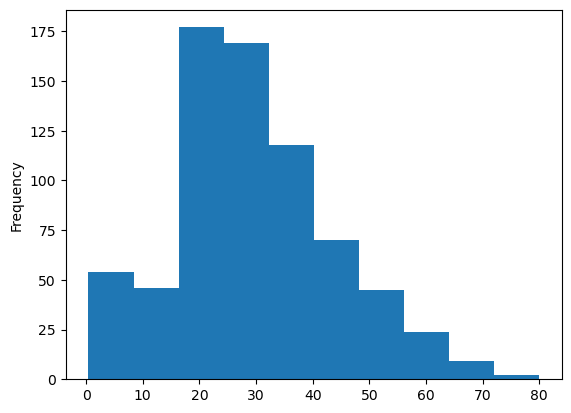

In [28]:
df['Age'].plot.hist()  # bins=30, log=True)

<div class="alert alert-success">

**EXERCISE**

What is the survival rate? (the relative number of people that survived)

<details><summary>Hints</summary>

- the 'Survived' column indicates whether someone survived (1) or not (0). 

</details>
    
</div>

In [29]:
df['Survived'].sum() / len(df['Survived'])

np.float64(0.3838383838383838)

In [30]:
df['Survived'].mean()

np.float64(0.3838383838383838)

<div class="alert alert-success">

**EXERCISE**

What is the maximum Fare? And the median?

</div>

In [31]:
df['Fare'].max()

np.float64(512.3292)

In [32]:
df['Fare'].median()

np.float64(14.4542)

<div class="alert alert-success">

**EXERCISE**
    
Calculate the 75th percentile (`quantile`) of the Fare price 
    
<details><summary>Hints</summary>

- look in the 'docstring' how to specify the percentile, either range [0, 1] or [0, 100]

</details>    

</div>

In [33]:
df['Fare'].quantile(0.75)

np.float64(31.0)

<div class="alert alert-success">

**EXERCISE**

Calculate the scaled Fares (scaled relative to its mean), and add this as a new column ('Fare_scaled') to the DataFrame.

</div>

In [34]:
df['Fare'] / df['Fare'].mean()

0      0.225126
1      2.213478
2      0.246086
3      1.648853
4      0.249967
         ...   
886    0.403674
887    0.931555
888    0.728166
889    0.931555
890    0.240652
Name: Fare, Length: 891, dtype: float64

In [35]:
df['Fare_scaled'] = df['Fare'] / df['Fare'].mean()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.225126
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.213478
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.246086
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.648853
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.249967


<div class="alert alert-success">

**EXERCISE**

* Calculate the log of the Fares. 
    
<details><summary>Hints</summary>

- check the `np.log` function.

</details>  

</div>

In [36]:
import numpy as np

In [37]:
np.log(df['Fare'])

/home/stijnvh/.pyenv/versions/miniconda3-latest/envs/course-python/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

# Numpy -  multidimensional data arrays

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array/vector/matrix object
* sophisticated (broadcasting) functions
* function implementation in C/Fortran assuring good performance if vectorized
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

Also known as *array oriented computing*. The recommended convention to import numpy is:

In [38]:
import numpy as np

## Speed

Memory-efficient container that provides fast numerical operations:

In [39]:
L = range(1000)
%timeit [i**2 for i in L]

42.6 μs ± 2.01 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [40]:
a = np.arange(1000)
%timeit a**2

699 ns ± 29.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## It's used by Pandas under the hood

The columns of a DataFrame are internally stored using numpy arrays. We can also retrieve this data as numpy arrays, for example using the `to_numpy()` method:

In [41]:
arr = countries["population"].to_numpy()
arr

array([11.3, 64.3, 81.3, 16.9, 64.9])

What we said above about element-wise operations and reductions works the same for numpy arrays:

In [42]:
arr + 10

array([21.3, 74.3, 91.3, 26.9, 74.9])

In [43]:
arr.mean()

np.float64(47.739999999999995)

Numpy contains more numerical functions than pandas, for example to calculate the log:

In [44]:
np.log(arr)

array([2.42480273, 4.16355963, 4.39814602, 2.82731362, 4.17284762])

Those functions can *also* be applied on pandas objects:

In [45]:
np.log(countries["population"])

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
Name: population, dtype: float64

<div class="alert alert-info">

__NumPy__ provides

* multi-dimensional, homogeneously typed arrays  (single data type!)

<br>

__Pandas__ provides

* 2D, heterogeneous data structure (multiple data types!)
* labeled (named) row and column index

</div>

# Acknowledgement


> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

---